# <center>Land Use Recommendations</center>

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [50]:
df = pd.read_csv("../data-raw/land-system-and-use-1.csv", encoding='latin1')

df.head()

,OBJECTID,Src_Elv,Src_Slope,Src_SlopeD,SRTM_Elv,SRTM_Slope,SRTM_SlpeD,Src_Lndfrm,Src_Lyth,SmplNam_v1,TypeNam_v1,Shape_Leng,Shape_Area,Legenda
0,14170,< 600,1,<2,< 600,1,<2,RePPProT: coastal beach ridges and swales,RePPProT Destom: sand ridges,Coastal flats,Coastal beach ridges and swales,113.999292,0.502134,Hutan Lahan Kering Sekunder
1,14170,< 600,1,<2,< 600,1,<2,RePPProT: coastal beach ridges and swales,RePPProT Destom: sand ridges,Coastal flats,Coastal beach ridges and swales,113.999292,0.502134,Hutan Lahan Kering Sekunder
2,14170,< 600,1,<2,< 600,1,<2,RePPProT: coastal beach ridges and swales,RePPProT Destom: sand ridges,Coastal flats,Coastal beach ridges and swales,113.999292,0.502134,Hutan Mangrove Primer
3,14170,< 600,1,<2,< 600,1,<2,RePPProT: coastal beach ridges and swales,RePPProT Destom: sand ridges,Coastal flats,Coastal beach ridges and swales,113.999292,0.502134,Hutan Mangrove Primer
4,14170,< 600,1,<2,< 600,1,<2,RePPProT: coastal beach ridges and swales,RePPProT Destom: sand ridges,Coastal flats,Coastal beach ridges and swales,113.999292,0.502134,Hutan Mangrove Primer


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    5269 non-null   int64  
 1   Src_Elv     5269 non-null   object 
 2   Src_Slope   5269 non-null   int64  
 3   Src_SlopeD  5269 non-null   object 
 4   SRTM_Elv    5269 non-null   object 
 5   SRTM_Slope  5269 non-null   int64  
 6   SRTM_SlpeD  5269 non-null   object 
 7   Src_Lndfrm  5269 non-null   object 
 8   Src_Lyth    5269 non-null   object 
 9   SmplNam_v1  5269 non-null   object 
 10  TypeNam_v1  5269 non-null   object 
 11  Shape_Leng  5269 non-null   float64
 12  Shape_Area  5269 non-null   float64
 13  Legenda     5269 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 576.4+ KB


In [52]:
# count unique values
df.nunique()

OBJECTID      91
Src_Elv        2
Src_Slope      4
Src_SlopeD     4
SRTM_Elv       2
SRTM_Slope     5
SRTM_SlpeD     5
Src_Lndfrm    39
Src_Lyth      29
SmplNam_v1    15
TypeNam_v1    23
Shape_Leng    91
Shape_Area    91
Legenda       19
dtype: int64

In [53]:
df.describe()

,OBJECTID,Src_Slope,SRTM_Slope,Shape_Leng,Shape_Area
count,5269.000000,5269.000000,5269.000000,5269.000000,5269.000000
mean,14282.458531,2.406719,1.605618,58.601925,0.746918
std,119.015849,1.365690,0.790806,75.025081,1.412927
min,14170.000000,1.000000,1.000000,0.007503,0.000003
25%,14249.000000,1.000000,1.000000,18.111703,0.070724
50%,14263.000000,2.000000,1.000000,24.509997,0.254347
75%,14294.000000,4.000000,2.000000,89.490430,0.342286
max,16455.000000,5.000000,5.000000,267.441305,5.026944


In [54]:
for i in range(len(df.columns)):
    print('Attribute ',i,': ',df.columns[i],'- Number of null value: ', df[df.columns[i]].isnull().sum())

Attribute  0 :  OBJECTID - Number of null value:  0
Attribute  1 :  Src_Elv - Number of null value:  0
Attribute  2 :  Src_Slope - Number of null value:  0
Attribute  3 :  Src_SlopeD - Number of null value:  0
Attribute  4 :  SRTM_Elv - Number of null value:  0
Attribute  5 :  SRTM_Slope - Number of null value:  0
Attribute  6 :  SRTM_SlpeD - Number of null value:  0
Attribute  7 :  Src_Lndfrm - Number of null value:  0
Attribute  8 :  Src_Lyth - Number of null value:  0
Attribute  9 :  SmplNam_v1 - Number of null value:  0
Attribute  10 :  TypeNam_v1 - Number of null value:  0
Attribute  11 :  Shape_Leng - Number of null value:  0
Attribute  12 :  Shape_Area - Number of null value:  0
Attribute  13 :  Legenda - Number of null value:  0


In [58]:
numeric_features = df.select_dtypes(include=[np.number])
for i in range(len(numeric_features.columns)):
    if pd.api.types.is_numeric_dtype(df[numeric_features.columns[i]]):
        col_name = numeric_features.columns[i]
        print('\nAttribute-',i,'-',col_name,':',df[col_name].dtype)
        Q1 = df[col_name].quantile(0.25)
        print('Q1:', Q1)
        Q3 = df[col_name].quantile(0.75)
        print('Q3:', Q3)
        IQR = Q3 - Q1
        print('IQR:', IQR)
        min = df[col_name].min()
        max = df[col_name].max()
        min_IQR = Q1-1.5*IQR
        max_IQR = Q3+1.5*IQR
        count_outliers = df[(df[col_name]<min_IQR) | (df[col_name]>max_IQR)].shape[0]
        print('Number of outliers:', count_outliers)
        print('Total number of records:', df[col_name].shape[0])
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute- 0 - OBJECTID : int64
Q1: 14249.0
Q3: 14294.0
IQR: 45.0
Number of outliers: 971
Total number of records: 5269
Low outlier is found
High outlier is found

Attribute- 1 - Src_Slope : int64
Q1: 1.0
Q3: 4.0
IQR: 3.0
Number of outliers: 0
Total number of records: 5269

Attribute- 2 - SRTM_Slope : int64
Q1: 1.0
Q3: 2.0
IQR: 1.0
Number of outliers: 160
Total number of records: 5269
High outlier is found

Attribute- 3 - Shape_Leng : float64
Q1: 18.11170271
Q3: 89.49043026
IQR: 71.37872755
Number of outliers: 625
Total number of records: 5269
High outlier is found

Attribute- 4 - Shape_Area : float64
Q1: 0.070723807
Q3: 0.342286236
IQR: 0.27156242900000005
Number of outliers: 1053
Total number of records: 5269
High outlier is found


In [61]:
# check outliers per loegenda 
for i in df['Legenda'].unique():
    d = df['Src_Slope'][df['Legenda']==i]
    Q1 = d.quantile(0.25)
    Q3 = d.quantile(0.75)
    IQR = Q3 - Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    print('Legenda:',i)
    print('Number of outliers:', d[(d<min_IQR) | (d>max_IQR)].shape[0])
    print('Total number of records:', d.shape[0])

Legenda: Hutan Lahan Kering Sekunder
Number of outliers: 0
Total number of records: 436
Legenda: Hutan Mangrove Primer
Number of outliers: 0
Total number of records: 35
Legenda: Belukar
Number of outliers: 0
Total number of records: 832
Legenda: Perkebunan
Number of outliers: 142
Total number of records: 925
Legenda: Pemukiman
Number of outliers: 23
Total number of records: 178
Legenda: Tanah Terbuka
Number of outliers: 419
Total number of records: 959
Legenda: Hutan Mangrove Sekunder
Number of outliers: 0
Total number of records: 103
Legenda: Tambak
Number of outliers: 0
Total number of records: 51
Legenda: Hutan Rawa Sekunder
Number of outliers: 4
Total number of records: 98
Legenda: Belukar Rawa
Number of outliers: 36
Total number of records: 319
Legenda: Pertanian Lahan Kering
Number of outliers: 0
Total number of records: 79
Legenda: Pertanian Lahan Kering Campur
Number of outliers: 151
Total number of records: 398
Legenda: Sawah
Number of outliers: 3
Total number of records: 97
L

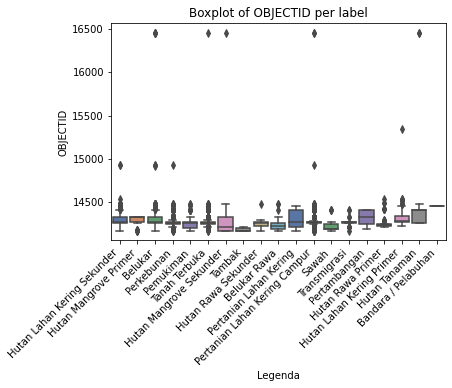

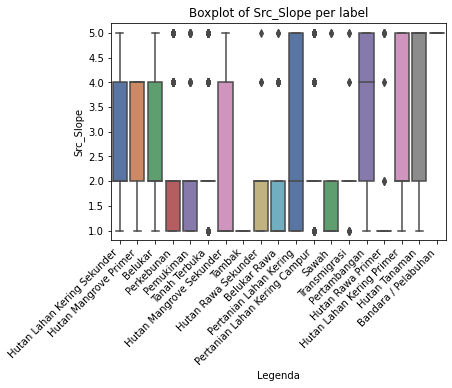

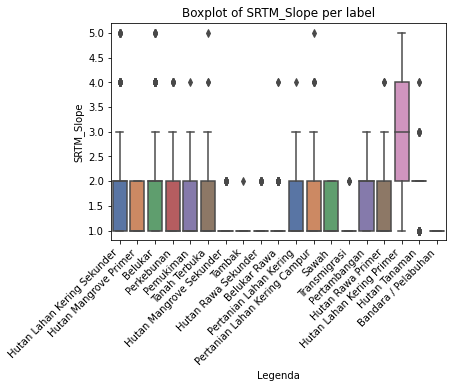

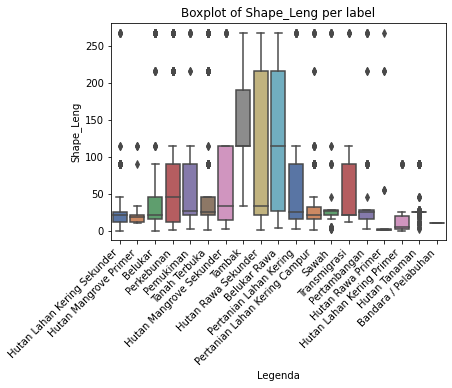

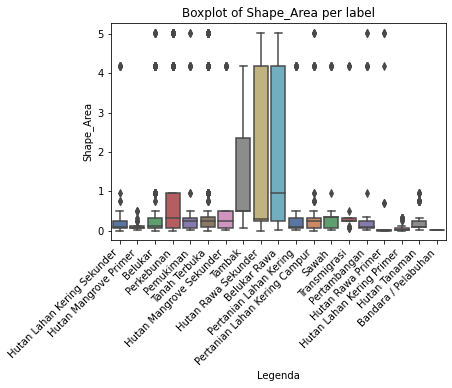

In [63]:
# boxplot per column per label
for i in numeric_features.columns:
    if i!='label':
        ax = sns.boxplot(y=i, x='Legenda', data=df, palette="deep")
        ax.set_title('Boxplot of '+i+' per label')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.show()

In [64]:
for i in df.Legenda.unique():
    print('Legenda: ',i,' - ',df.Legenda.value_counts()[i]/len(df)*100,'%')

Legenda:  Hutan Lahan Kering Sekunder  -  8.274814955399506 %
Legenda:  Hutan Mangrove Primer  -  0.6642626684380337 %
Legenda:  Belukar  -  15.79047257544126 %
Legenda:  Perkebunan  -  17.555513380148035 %
Legenda:  Pemukiman  -  3.378250142342001 %
Legenda:  Tanah Terbuka  -  18.200797115202125 %
Legenda:  Hutan Mangrove Sekunder  -  1.954830138546214 %
Legenda:  Tambak  -  0.967925602581135 %
Legenda:  Hutan Rawa Sekunder  -  1.8599354716264944 %
Legenda:  Belukar Rawa  -  6.05427974947808 %
Legenda:  Pertanian Lahan Kering  -  1.4993357373315621 %
Legenda:  Pertanian Lahan Kering Campur  -  7.553615486809641 %
Legenda:  Sawah  -  1.8409565382425508 %
Legenda:  Transmigrasi  -  0.5503890681343709 %
Legenda:  Pertambangan  -  2.97969254127918 %
Legenda:  Hutan Rawa Primer  -  1.0817992028847978 %
Legenda:  Hutan Lahan Kering Primer  -  2.2015562725374838 %
Legenda:  Hutan Tanaman  -  7.572594420193584 %
Legenda:  Bandara / Pelabuhan  -  0.01897893338394382 %


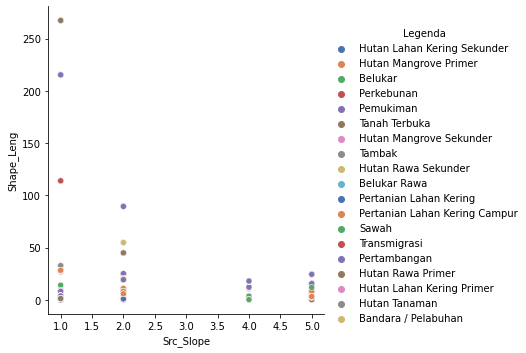

In [68]:
sns.relplot(x='Src_Slope',y='Shape_Leng',data=df,kind='scatter',hue='Legenda',height=5, palette='deep')

<AxesSubplot:>

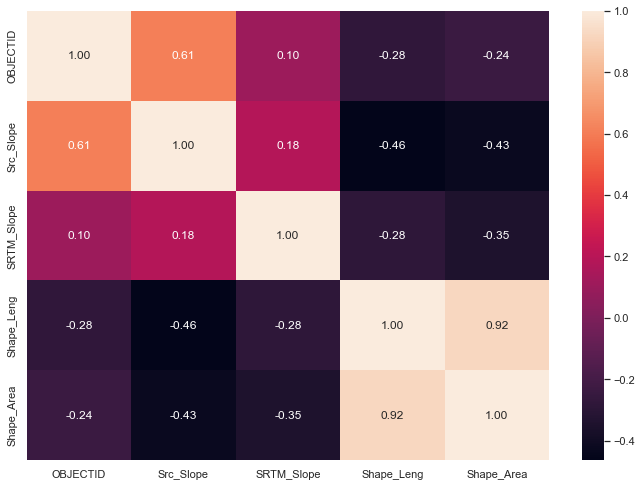

In [70]:
# Heat Map (Corr Coeff)
corr = df.corr(numeric_only=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True, fmt='.2f')

## Data Preprocessing

### Data Cleansing
- data types
- handling missing value
- exclude outlier

Tidak ditemukan missing value
Perhitungan outliers yang digunakan pada per column per fitur

In [71]:
df['Legenda'] = df['Legenda'].astype('category')
df.dtypes

OBJECTID         int64
Src_Elv         object
Src_Slope        int64
Src_SlopeD      object
SRTM_Elv        object
SRTM_Slope       int64
SRTM_SlpeD      object
Src_Lndfrm      object
Src_Lyth        object
SmplNam_v1      object
TypeNam_v1      object
Shape_Leng     float64
Shape_Area     float64
Legenda       category
dtype: object

In [72]:
encoder = OrdinalEncoder()

column_to_encode = ['Src_Elv', 'Src_SlopeD', 'SRTM_Elv', 'SRTM_SlpeD', 'Src_Lndfrm', 'Src_Lyth', 'SmplNam_v1', 'TypeNam_v1' ]

for column in column_to_encode:
    df[column] = encoder.fit_transform(df[[column]])
    df[column] = df[column].astype(int)
df.head()

,OBJECTID,Src_Elv,Src_Slope,Src_SlopeD,SRTM_Elv,SRTM_Slope,SRTM_SlpeD,Src_Lndfrm,Src_Lyth,SmplNam_v1,TypeNam_v1,Shape_Leng,Shape_Area,Legenda
0,14170,1,1,2,1,1,3,4,19,3,2,113.999292,0.502134,Hutan Lahan Kering Sekunder
1,14170,1,1,2,1,1,3,4,19,3,2,113.999292,0.502134,Hutan Lahan Kering Sekunder
2,14170,1,1,2,1,1,3,4,19,3,2,113.999292,0.502134,Hutan Mangrove Primer
3,14170,1,1,2,1,1,3,4,19,3,2,113.999292,0.502134,Hutan Mangrove Primer
4,14170,1,1,2,1,1,3,4,19,3,2,113.999292,0.502134,Hutan Mangrove Primer


In [78]:
df = df.drop(['OBJECTID'], axis=1)

In [73]:
df.dtypes

OBJECTID         int64
Src_Elv          int32
Src_Slope        int64
Src_SlopeD       int32
SRTM_Elv         int32
SRTM_Slope       int64
SRTM_SlpeD       int32
Src_Lndfrm       int32
Src_Lyth         int32
SmplNam_v1       int32
TypeNam_v1       int32
Shape_Leng     float64
Shape_Area     float64
Legenda       category
dtype: object

## Splitting train and test data

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Legenda'], axis=1)
y = df['Legenda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4215, 12), (1054, 12), (4215,), (1054,))

,OBJECTID,Src_Elv,Src_Slope,Src_SlopeD,SRTM_Elv,SRTM_Slope,SRTM_SlpeD,Src_Lndfrm,Src_Lyth,SmplNam_v1,TypeNam_v1,Shape_Leng,Shape_Area
3900,14275,1,2,1,1,4,0,9,25,5,5,5.202835,0.022075
906,14214,1,1,2,1,1,3,29,4,14,15,267.441305,4.195058
3092,14272,1,2,1,1,1,3,9,25,5,5,20.636634,0.254347
1326,14249,1,2,1,1,1,3,37,10,8,11,5.053980,0.031121
1926,14262,0,2,1,1,2,1,34,25,8,13,89.490430,0.310266


## Descision Tree Classifier Classifier

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_

Validation Accuracy score:  0.3129300118623962
Testing Accuracy score:  0.3225806451612903
dt-Classification report: 
                                precision    recall  f1-score   support

                      Belukar       0.27      0.44      0.33       167
                 Belukar Rawa       0.00      0.00      0.00        55
    Hutan Lahan Kering Primer       0.29      0.15      0.20        27
  Hutan Lahan Kering Sekunder       0.18      0.02      0.04        83
        Hutan Mangrove Primer       0.00      0.00      0.00         9
      Hutan Mangrove Sekunder       0.00      0.00      0.00        24
            Hutan Rawa Primer       0.89      0.73      0.80        11
          Hutan Rawa Sekunder       0.00      0.00      0.00        18
                Hutan Tanaman       0.50      0.64      0.56        83
                    Pemukiman       0.00      0.00      0.00        44
                   Perkebunan       0.35      0.62      0.45       172
                 Pertambanga

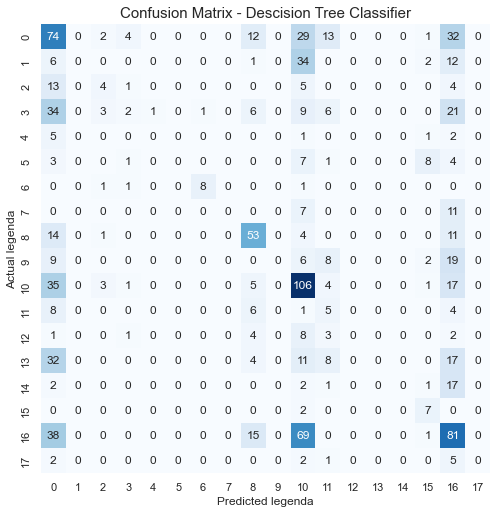

In [86]:
# dt model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Validation Accuracy score: ', cross_val_score(dt, X_train, y_train, cv=5).mean())
print('Testing Accuracy score: ', accuracy_score(y_test, y_pred))
print('dt-Classification report: \n', classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.ylabel('Actual legenda')
plt.xlabel('Predicted legenda')
plt.title('Confusion Matrix - Descision Tree Classifier', size = 15);

## Random Forest Classifier

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Validation Accuracy score:  0.30984578884934755
Testing Accuracy score:  0.3225806451612903
Random Forest-Classification report: 
                                precision    recall  f1-score   support

                      Belukar       0.27      0.44      0.33       167
                 Belukar Rawa       0.00      0.00      0.00        55
    Hutan Lahan Kering Primer       0.23      0.11      0.15        27
  Hutan Lahan Kering Sekunder       0.17      0.02      0.04        83
        Hutan Mangrove Primer       0.00      0.00      0.00         9
      Hutan Mangrove Sekunder       0.00      0.00      0.00        24
            Hutan Rawa Primer       0.90      0.82      0.86        11
          Hutan Rawa Sekunder       0.00      0.00      0.00        18
                Hutan Tanaman       0.50      0.64      0.56        83
                    Pemukiman       0.00      0.00      0.00        44
                   Perkebunan       0.35      0.62      0.45       172
                

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

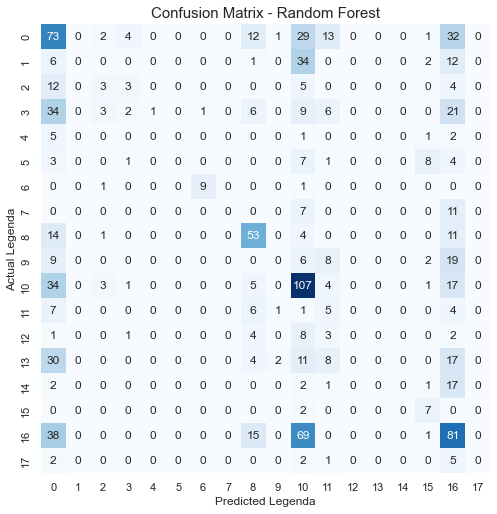

In [87]:
# SVM Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Validation Accuracy score: ', cross_val_score(rf, X_train, y_train, cv=5).mean())
print('Testing Accuracy score: ', accuracy_score(y_test, y_pred))
print('Random Forest-Classification report: \n', classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.ylabel('Actual Legenda')
plt.xlabel('Predicted Legenda')
plt.title('Confusion Matrix - Random Forest', size = 15);

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Best Score: 0.17498337631164956
                               precision    recall  f1-score   support

          Bandara / Pelabuhan       0.00      0.00      0.00         1
                      Belukar       0.30      0.15      0.20       832
                 Belukar Rawa       0.00      0.00      0.00       319
    Hutan Lahan Kering Primer       0.43      0.41      0.42       116
  Hutan Lahan Kering Sekunder       0.00      0.00      0.00       436
        Hutan Mangrove Primer       0.00      0.00      0.00        35
      Hutan Mangrove Sekunder       0.00      0.00      0.00       103
            Hutan Rawa Primer       0.75      0.82      0.78        57
          Hutan Rawa Sekunder       0.00      0.00      0.00        98
                Hutan Tanaman       0.45      0.51      0.48       399
                    Pemukiman       0.00      0.00      0.00       178
                   Perkebunan       0.43      0.56      0

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Best score:  0.3136417556346382
Best parameters:  {'max_depth': None, 'min_samples_split': 10}
Best estimator:  DecisionTreeClassifier(min_samples_split=10)


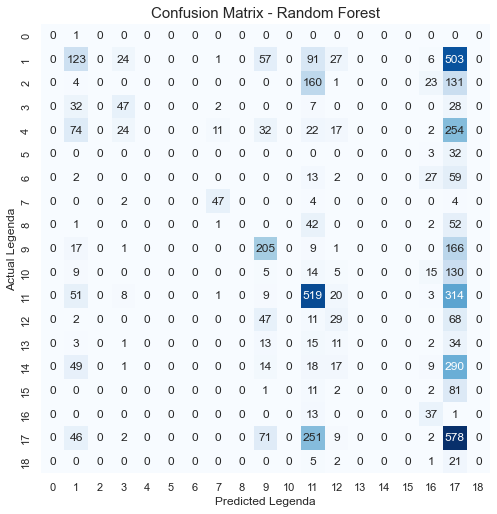

In [91]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()


param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


dt_cv = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5)

dt_cv.fit(X, y)

print("Best Parameters:", dt_cv.best_params_)
print("Best Score:", dt_cv.best_score_)

best_model = dt_cv.best_estimator_
y_pred = best_model.predict(X)

# Menampilkan classification report
print(classification_report(y, y_pred))
dt_cv.fit(X_train, y_train)
print('Best score: ', dt_cv.best_score_)
print('Best parameters: ', dt_cv.best_params_)
print('Best estimator: ', dt_cv.best_estimator_)

conf_mat = confusion_matrix(y, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.ylabel('Actual Legenda')
plt.xlabel('Predicted Legenda')
plt.title('Confusion Matrix - Random Forest', size = 15);

In [93]:
df.tail()

,Src_Elv,Src_Slope,Src_SlopeD,SRTM_Elv,SRTM_Slope,SRTM_SlpeD,Src_Lndfrm,Src_Lyth,SmplNam_v1,TypeNam_v1,Shape_Leng,Shape_Area,Legenda
5264,1,5,3,1,2,1,2,20,12,19,3.240478,0.042182,Hutan Tanaman
5265,1,5,3,1,2,1,2,20,12,19,3.240478,0.042182,Belukar
5266,1,5,3,1,2,1,2,20,12,19,3.240478,0.042182,Belukar
5267,1,5,3,1,2,1,2,20,12,19,3.240478,0.042182,Belukar
5268,1,5,3,1,2,1,2,20,12,19,3.240478,0.042182,Pertanian Lahan Kering Campur


In [ ]:
to_predict = [[[1, 0, 2, 1, 1, 2, 3, 17, 2, 1, 113.999292, 0.502134]], [[0, 3, 2, 1, 2, 1, 4, 11, 8, 10, 3.240478, 0.042182]]]

print(f"\n>>> Percobaan untuk memprediksi data {to_predict[0]}")
print(f"Hasil prediksi kNN: {dt.predict(to_predict[0])[0]}")
print(f"Hasil prediksi SVM: {rf.predict(to_predict[0])[0]}")

print(f"\n>>> Percobaan untuk memprediksi data {to_predict[1]}")
print(f"Hasil prediksi kNN: {dt.predict(to_predict[1])[0]}")
print(f"Hasil prediksi SVM: {rf.predict(to_predict[1])[0]}")
